<a href="https://colab.research.google.com/github/DebjitHore/TensorflowDeveloperUdemy/blob/main/01_NNRegressionTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

## Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


## Creating data to view and fit

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

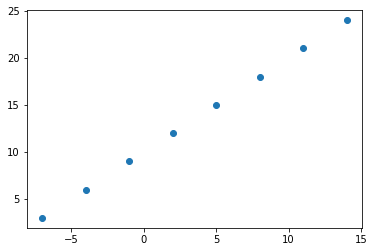

In [2]:
#Create features
# X= np.arange(start=-7, stop=15, step=3, dtype='float32')
X= np.array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

#Create labels
# y = np.arange(start=3, stop=25, step=3, dtype='float32')
y= np.array([3.,  6.,  9., 12., 15., 18., 21., 24.])

X, y


# Visualise created data

plt.scatter(X,y)
X, y

In [3]:
# The relationship therefore that we want our NN to learn to be able to fit the regression is y=X+10
y == X+10 #Function b/w X and y

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
#Create demo tensor for our housing price prediction problem
house_info= tf.constant(['bedroom', 'bathroom', 'garage'])
house_price= tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape= X.shape
output_shape= y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our numpy array to tensors

X= tf.cast(tf.constant(X), dtype= 'float32')
y= tf.cast(tf.constant(y), dtype= 'float32')
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modeling with Tensorflow

* Create a model- define input, output layers as well as hidden layers
* Compile a model- define loss function, optimizer, and evaluation metrics
* Fitting a model- letting model find patterns between X & y

In [7]:
#1. Create a problem specific model
  
tf.random.set_seed(42)

model= tf.keras.Sequential([tf.keras.Input(shape=(1,)),
                            tf.keras.layers.Dense(1)
                            ])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             metrics=["mae"])

#3 Fit the model

model.fit(X,y,epochs=1500, verbose=0)


#model.fit(tf.expand_dims(X, axis=-1), y, epochs=1200) # <- updated line
# Alternate after Tensorflow where you expand a scalar input to have one more dimension

In [8]:
model.evaluate(X,y)

1/1 [==============================] - 0s 127ms/step - loss: 0.1204 - mae: 0.1204


[0.12037312984466553, 0.12037312984466553]

In [9]:
model.predict([17.])

array([[27.300987]], dtype=float32)

### Improving the model output using Tensorflow

* Model can be improved in the creation step by increasing the number of layers, increase the number of hidden units in every layer, change the activation function.
* Model can be improved in the compiling step by changing the optimisation function or the cost metric, and the **learning rate** of the optimiser.
* Model can be improved in the fitting step by fitting it for more epochs, or on more training data.


In [10]:
# We are improving the same model by making the NN deeper, using activation functions, using an Adam optimiser instead of SGD
#1. Create a problem specific model
model= tf.keras.Sequential([
            tf.keras.Input(shape=(1,)),
            tf.keras.layers.Dense(100, activation= "relu"),
            tf.keras.layers.Dense(100, activation= "relu"),
            tf.keras.layers.Dense(100, activation= "relu"),
            tf.keras.layers.Dense(1)
])          

In [11]:
#2. Compile the model
model.compile(loss= tf.keras.losses.mean_squared_error,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

In [12]:
#3 Fit the model

model.fit(X, y, epochs=1500)

Epoch 1/1500
1/1 [==============================] - 1s 503ms/step - loss: 258.4984 - mae: 14.3099
Epoch 2/1500
1/1 [==============================] - 0s 16ms/step - loss: 183.3302 - mae: 12.1109
Epoch 3/1500
1/1 [==============================] - 0s 8ms/step - loss: 128.8496 - mae: 10.1189
Epoch 4/1500
1/1 [==============================] - 0s 7ms/step - loss: 69.7967 - mae: 7.7688
Epoch 5/1500
1/1 [==============================] - 0s 8ms/step - loss: 26.0351 - mae: 4.2608
Epoch 6/1500
1/1 [==============================] - 0s 7ms/step - loss: 47.5184 - mae: 5.7407
Epoch 7/1500
1/1 [==============================] - 0s 7ms/step - loss: 70.7085 - mae: 6.6727
Epoch 8/1500
1/1 [==============================] - 0s 7ms/step - loss: 46.8069 - mae: 5.6752
Epoch 9/1500
1/1 [==============================] - 0s 7ms/step - loss: 24.5425 - mae: 4.2578
Epoch 10/1500
1/1 [==============================] - 0s 7ms/step - loss: 20.7726 - mae: 3.7385
Epoch 11/1500
1/1 [==============================]

In [13]:
model.predict([17.])

array([[27.734266]], dtype=float32)

## Making a NN regression model with a bigger dataset.

### Creating a larger dataset and visualising it

In [14]:
A= tf.range(-100, 100, 4)
B= 2*A + 10
A,B

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-190, -182, -174, -166, -158, -150, -142, -134, -126, -118, -110,
        -102,  -94,  -86,  -78,  -70,  -62,  -54,  -46,  -38,  -30,  -22,
         -14,   -6,    2,   10,   18,   26,   34,   42,   50,   58,   66,
          74,   82,   90,   98,  106,  114,  122,  130,  138,  146,  154,
         162,  170,  178,  186,  194,  202], dtype=int32)>)

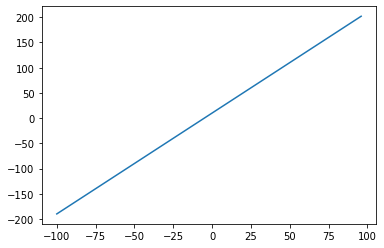

In [15]:
plt.plot(A,B)

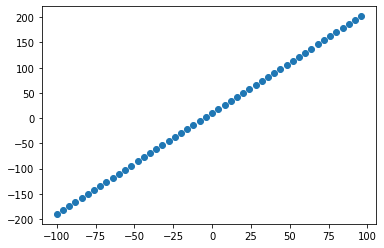

In [16]:
plt.scatter(A,B)

### Splitting the total training data into training, validation and test data set.

In [17]:
#Check the length of available sample size
len(X)

8

In [18]:
A_train= A[: 40] #training features
A_test= A[40:] #testing features
B_train= B[:40] #training labels
B_test= B[40:] #testing labels

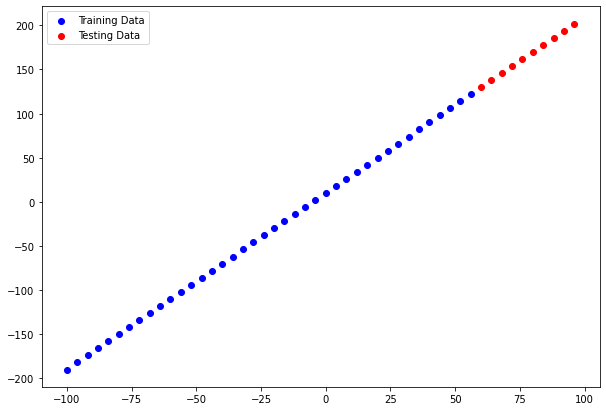

In [19]:
#Plot training and test data
plt.figure(figsize=(10,7))

plt.scatter(A_train, B_train, c="b", label= "Training Data") #Plot training data in blue
plt.scatter(A_test, B_test, c="r", label="Testing Data") #Plot training data in blue
plt.legend();

In [20]:
model= tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name= 'input_layer'),
    tf.keras.layers.Dense(100, activation="relu", name='first_hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

model.compile(loss= tf.keras.losses.mean_squared_error,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['mse'])


In [21]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Non trainable parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**

In [22]:
model.fit(A_train, B_train, epochs=100, verbose=0)

In [23]:
model.predict(A_test)

array([[125.24476],
       [133.51277],
       [141.7808 ],
       [150.04884],
       [158.31688],
       [166.58492],
       [174.85295],
       [183.12099],
       [191.38899],
       [199.65703]], dtype=float32)

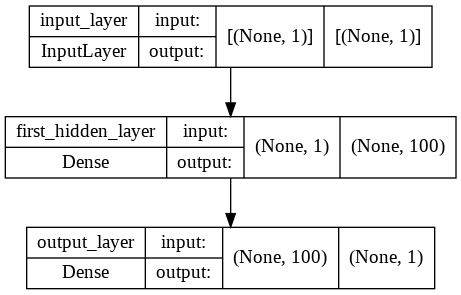

In [24]:
# Visualising the shape of the model, at individual layer level
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualising model predicitons
* To visualise predictions, plot them against ground truth labels.
*`y_test` versus `y_pred` (ground truth versus your model predictions)

In [25]:
B_pred= model.predict(A_test)
B_pred

array([[125.24476],
       [133.51277],
       [141.7808 ],
       [150.04884],
       [158.31688],
       [166.58492],
       [174.85295],
       [183.12099],
       [191.38899],
       [199.65703]], dtype=float32)

In [26]:
# Plotting function to reuse

def plot_predictions(train_data=A_train, train_labels= B_train,
                     test_data= A_test, test_labels= B_test,
                     predictions= B_pred
                     ):
  """ 
  Plot training data, test data, and compares predicitons to ground truth
  """
  plt.figure(figsize= (10,7))
  plt.scatter(train_data, train_labels, c="b", label='Training data')
  plt.scatter(test_data, test_labels, c="g", label='Testing data')

  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()


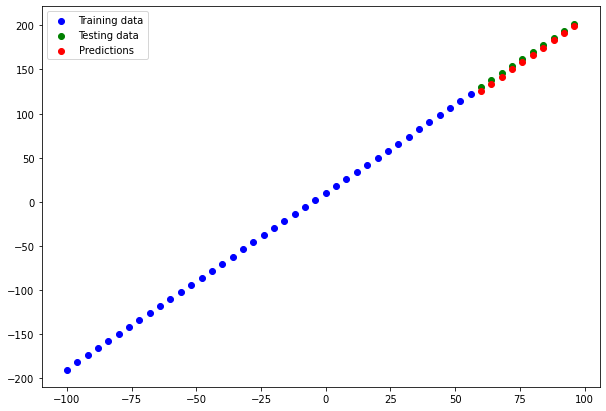

In [27]:
plot_predictions() #complete overlap, change metric to mae in model to see some shift

In [28]:
#Make functions for MSE and MAE to use in experiments section

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=y_pred)

## Setting up Tensorflow Modeling Experiments Part-1

In [29]:
# Running experiments to improve a model.
#Skipped this section, already tried this myself beforehand.

* TensorBoard- component of the Tensorflow library to help track modelling experiments 
* Weights and Biases- tool to track all kinds of machine learning experiments.

## Saving ML models
* Saving allows models to be used outside of Google Colab (or wherever they were trained) such as in a web application.
* SavedModel format
* HDF5 format

In [30]:
model.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [31]:
model.save("best_model_HDF5_format.h5")

### Loading in a saved model

In [32]:
loaded_SavedModel= tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### Download a model (or any file) from Google Colab 

In [33]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger working example

In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [71]:
# Read data
insurance= pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Use `pd.dummies` to change the object type data to numerical data through One Hot vector encoding

In [74]:
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [75]:
#Create X and y values (features and labels)
X= insurance_one_hot.drop('charges', axis=1)
y= insurance_one_hot['charges']
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [76]:
#Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [98]:
insurance_model= tf.keras.Sequential([

                                                            tf.keras.layers.Dense(10, activation='relu'),
                                                            tf.keras.layers.Dense(1)
                                                            ])

In [99]:
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics=['mae']
                        )

In [ ]:
insurance_model.fit(X_train, y_train, epochs=100)

In [102]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7398.1201 - mae: 7398.1201


[7398.1201171875, 7398.1201171875]

Right now it looks like our model isn't performing too well. Improve it!

To (try) to improve: 
* Extra hidden layer with more hidden units
* Train for longer

In [114]:
insurance_Model_2= tf.keras.Sequential([
                                        tf.keras.layers.Dense(100, activation='relu'),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])

insurance_Model_2.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

In [115]:
history=insurance_Model_2.fit(X_train, y_train, epochs=200, verbose=0)
insurance_Model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1824.4679 - mae: 1824.4679


[1824.4678955078125, 1824.4678955078125]

Model `mae` decreases from 7398 to 1824 from improvement

Text(0.5, 0, 'Epochs')

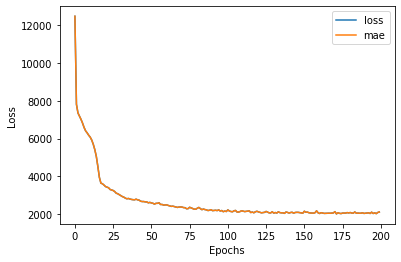

In [117]:
 # Plot history, also known as a loss curve or a training curve
 pd.DataFrame(history.history).plot()
 plt.ylabel('Loss')
 plt.xlabel('Epochs')

## Preprocessing Data (normalisation and standardisation)

* NN prefer normalisation because that does not reduce sensitivity of the network to outliers

In [118]:
# Read data
insurance_normalised= pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance_normalised.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [120]:
ct= make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #turn all values in these columns 
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker', 'region'])
)

X=insurance_normalised.drop('charges', axis=1)
y= insurance['charges']

In [121]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train) 
#Transform training and test data with normalisation (MinMaxScaler) and OneHotEncoder

X_train_normal= ct.transform(X_train)
X_test_normal= ct.transform(X_test
                            )



In [126]:
X_train.loc[1], X_train_normal[1]

(age                18
 sex              male
 bmi             33.77
 children            1
 smoker             no
 region      southeast
 Name: 1, dtype: object,
 array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]))

In [136]:
history_normalised=insurance_Model_2.fit(X_train_normal, y_train, epochs=200, verbose=0)
insurance_Model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1719.7822 - mae: 1719.7822


[1719.7822265625, 1719.7822265625]

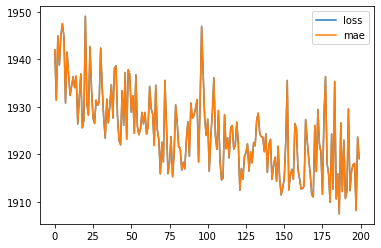

In [137]:
pd.DataFrame(history_normalised.history).plot()